<a href="https://colab.research.google.com/github/Ruqyai/MENADD-DL/blob/main/CNN/mnist_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,AveragePooling2D,Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.datasets import mnist
from pathlib import Path

In [2]:

(train_x,train_y),(test_x,test_y)=mnist.load_data()

train_x=np.reshape(train_x,(-1,28,28,1))
print("train_x.shape:{}".format(train_x.shape))
train_y=np_utils.to_categorical(train_y,10)
print("train_y.shape:{}".format(train_y.shape))

test_x=np.reshape(test_x,(-1,28,28,1))
print("test_x.shape:{}".format(test_x.shape))
test_y=np_utils.to_categorical(test_y,10)
print("test_y.shape:{}".format(test_y.shape))

11501568/11490434 [==============================] - 0s 0us/step
train_x.shape:(60000, 28, 28, 1)
train_y.shape:(60000, 10)
test_x.shape:(10000, 28, 28, 1)
test_y.shape:(10000, 10)


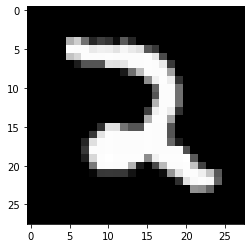

In [3]:
index = np.random.randint(0, len(train_x))
image = train_x[index].squeeze()

plt.figure(figsize=(4,4))
plt.imshow(image, cmap="gray")

In [4]:

model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5), padding='same', strides=(1, 1), activation ='relu', input_shape = (28,28,1)))

model.add(AveragePooling2D(pool_size=(2,2) , strides=(2, 2)))

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding='valid', strides=(1, 1), activation ='relu'))

model.add(AveragePooling2D(pool_size=(2,2) , strides=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation = "relu"))

model.add(Dense(84, activation = "relu"))

model.add(Dense(10, activation = "softmax"))


In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Output model structure
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [6]:
model.fit(train_x,train_y,
           batch_size=64,
           epochs=3,
           verbose=1,
           validation_data=(test_x,test_y))


Epoch 1/3
938/938 [==============================] - 51s 38ms/step - loss: 0.6530 - accuracy: 0.8665 - val_loss: 0.0815 - val_accuracy: 0.9754
Epoch 2/3
938/938 [==============================] - 36s 38ms/step - loss: 0.0680 - accuracy: 0.9785 - val_loss: 0.0540 - val_accuracy: 0.9837
Epoch 3/3
938/938 [==============================] - 36s 39ms/step - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0610 - val_accuracy: 0.9818


In [7]:
score = model.evaluate(test_x, test_y, verbose=1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0610 - accuracy: 0.9818
Val loss: 0.060973554849624634
Val accuracy: 0.9818000197410583
